256 256 3
256 256 3


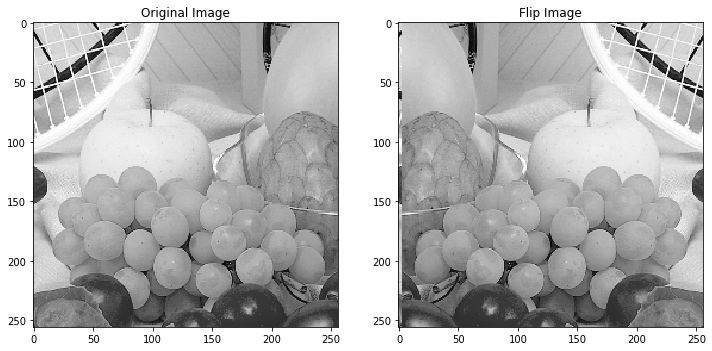

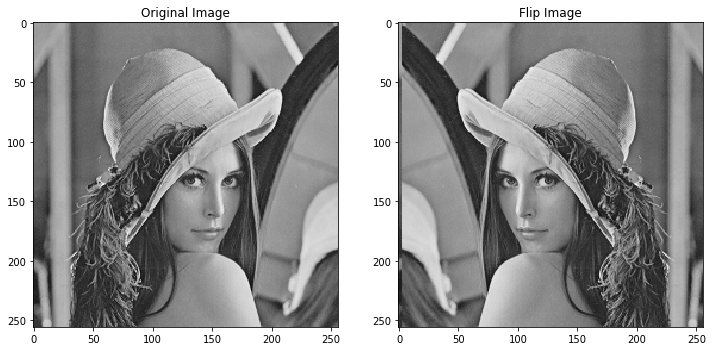

In [1]:
#Horizontal Flip 
###############################
def flip(x,y,z,array):
    hflip=np.zeros((x,y,z))

    z1=z-1
    y1=y-1
    for i in range(0,x):
        for j in range(0,y):
            for k in range(0,z):
                hflip[i,j,k]=array[i,y1,z1]
                z1=z-1
            y1=y1-1 #Decrement
            z1=z-1
        y1=z-1 #Initialise for next ith loop  
    return hflip
################################
import os
import matplotlib.image as img
import cv2
import matplotlib.pyplot as plt
import numpy as np
images = []
folder = 'path'
for filename in os.listdir(folder):
    try:
        m = cv2.imread(os.path.join(folder, filename))
        if m is not None:
            images.append(m)
    except:
        pass
        #print('Cant import ' + filename)

for i in range (len(images)):
    array=np.asarray(images[i])
    array=array/255 #Normalisation
    (x,y,z)=np.shape(array)
    print(x,y,z)
    i_flip=flip(x,y,z,array)
    #Print images
    fig = plt.figure(figsize=(12, 12))


    fig.add_subplot(1,2,1)
    plt.title('Original Image')
    plt.gray()
    plt.imshow(array)

    fig.add_subplot(1,2,2)
    plt.imshow(i_flip)
    plt.title('Flip Image')

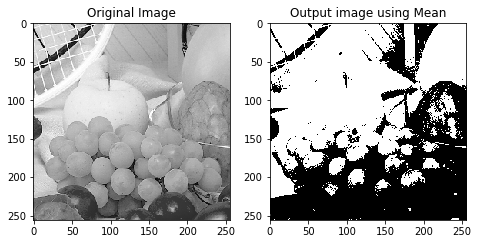

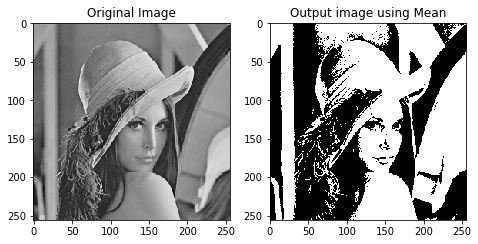

In [8]:
#Thresholding

import os
import matplotlib.image as img
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np

images = []
folder = 'path'
for filename in os.listdir(folder):
    try:
        m = cv2.imread(os.path.join(folder, filename))
        if m is not None:
            images.append(m)
    except:
        pass
        #print('Cant import ' + filename)

threshold_image=[]
for k in range (len(images)):
    array=np.asarray(images[k])
    array=array/255 #Normalisation
    (x,y,z)=np.shape(array)
    #print(x,y,z)
    #Calculating mean and variance
    pixel_sum=0
    pixel_sq=0
    for i in range(0,x):
      for j in range(0,y):
         for k in range(0,z):
            pixel_sum=pixel_sum+array[i,j,k]


    mean=pixel_sum/(x*y*z)


    binary=np.zeros((x,y))


    #Using mean
    for i in range (0,x):
      for j in range(0,y):
        for k in range(0,z):
            if array[i,j,k]>=mean:
                binary[i,j]=1
            else:
                binary[i,j]=0


    threshold_image.append(binary)
    fig = plt.figure(figsize=(12, 12))

    fig.add_subplot(1,3,1)
    plt.title('Original Image')
    plt.imshow(array)

    fig.add_subplot(1,3,2)
    plt.title('Output image using Mean')
    plt.imshow(binary)



Enter the required zoom in %67
Enter the required zoom out %78


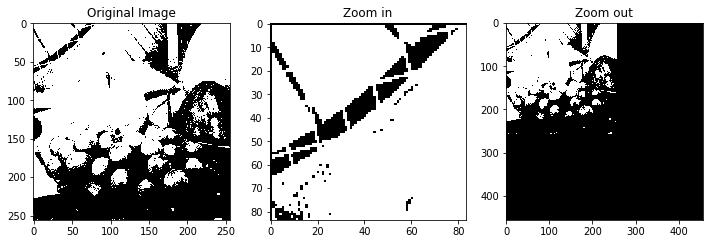

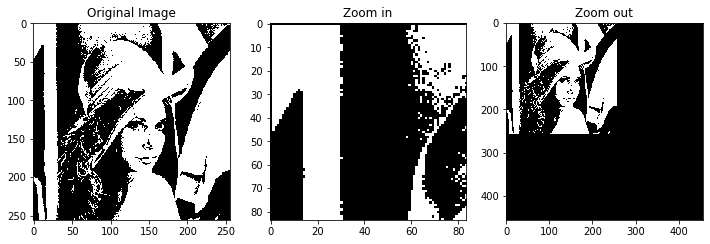

In [10]:
#Zoom in and Zoom out 


#Zoom in Zoom out 
zin=int(input('Enter the required zoom in %'))
zout=int(input('Enter the required zoom out %'))

for a in range(len(threshold_image)):
    array=np.asarray(threshold_image[a])
    (x,y)=np.shape(array)


    x1=round(x*(zin/100))
    y1=round(y*(zin/100))

    zoomin=np.zeros(((x-x1),(y-y1)))

    for i in range (1,(x-x1)):
      for j in range (1,(y-y1)):
        zoomin[i,j]=array[i,j];


    x2=round(x*(zout/100))
    y2=round(y*(zout/100))

    zoomout=np.zeros(((x+x2),(y+y2)))

    for i in range (1,x):
      for j in range (1,y):
        zoomout[i,j]=array[i,j];



    fig = plt.figure(figsize=(12, 12))

    fig.add_subplot(1,3,1)
    plt.title('Original Image')
    plt.imshow(array)

    fig.add_subplot(1,3,2)
    plt.title('Zoom in')
    plt.imshow(zoomin)

    fig.add_subplot(1,3,3)
    plt.title('Zoom out')
    plt.imshow(zoomout)



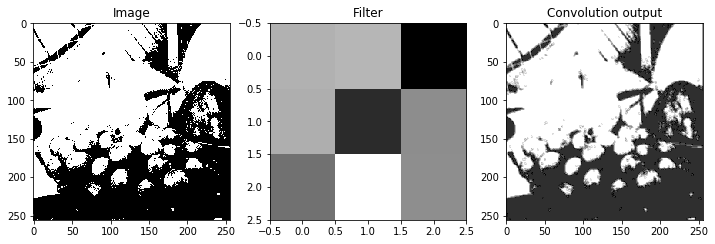

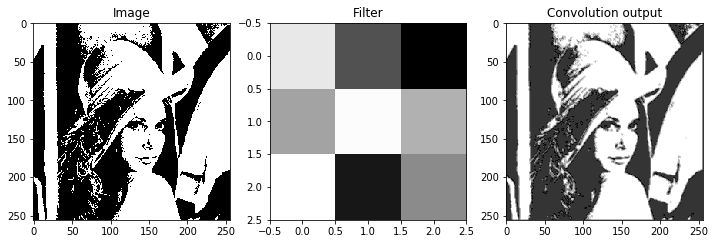

In [18]:
#Convolution
##########################################
def hflip(x2,y2,filter1):
    hflip=np.zeros((x2,y2))

    y1=y2-1
    for i in range(0,x2):
      for j in range(0,y2):
             hflip[i,j]=filter1[i,y1]
             y1=y1-1 #Decrement
    
      y1=y2-1 #Initialise for next ith loop  
    return hflip

##########################################
def vflip(x3,y3,hf_filter1):
    vflip=np.zeros((x3,y3))

    x4=x3-1
    for i in range(0,x3):
      for j in range(0,y3):
             vflip[i,j]=hf_filter1[x4,j]
      x4=x4-1 #Next row from bottom  
    return vflip
##############################################
def convolution(pad_image,vf_filter,x,y,xrow,xcolumn):
    conv_image=np.ones((x+2*xrow,y+2*xcolumn))
    product=0
    sum=0

    for i in range (0,x+2*xrow):
        for j in range (0,y+2*xcolumn):
              for k in range(0,a):
                for l in range(0,b):
                    if (((k+i)<(x+2*xrow)) and ((l+j)<(y+2*xcolumn))):
                        if  pad_image[k+i,l+j]>0:
                            product=pad_image[k+i,l+j]*vf_filter[k,l]
                            sum=sum+product
              if sum>0:
                 conv_image[k+i-1,l+j-1]=sum 
              product=0
              sum=0

    crop_image=conv_image[xrow:xrow+x,xcolumn:xcolumn+y]
    return crop_image
################################################

for a in range(len(threshold_image)):
    array=np.asarray(threshold_image[a])
    (x,y)=np.shape(array)
    filter=np.random.rand(3,3)
    (a,b)=np.shape(filter)
    hf_filter=hflip(a,b,filter)
    vf_filter=vflip(a,b,hf_filter)
    xrow=a-1
    xcolumn=b-1
    pad_image=np.pad(array,(xrow,xcolumn),'constant')
    c_image=convolution(pad_image,vf_filter,x,y,xrow,xcolumn)
    ################################################

    fig = plt.figure(figsize=(12, 12))

    fig.add_subplot(1,3,1)
    plt.title('Image')
    plt.imshow(array)

    fig.add_subplot(1,3,2)
    plt.title('Filter')
    plt.imshow(filter)

    fig.add_subplot(1,3,3)

    plt.title('Convolution output')
    plt.imshow(c_image)

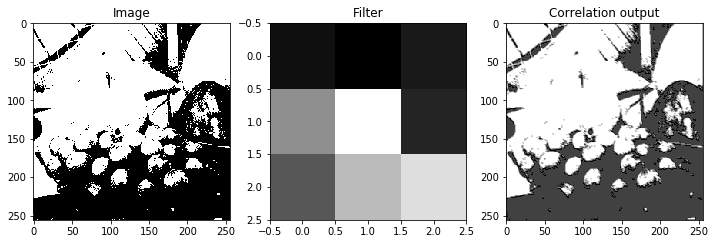

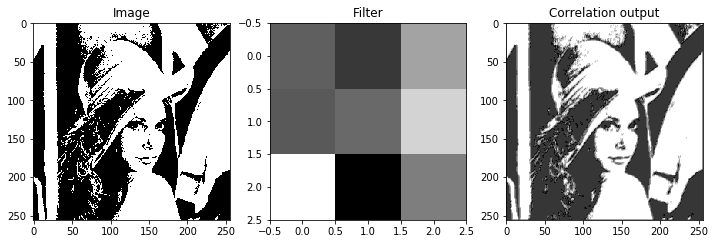

In [17]:
#Correlation
##########################################
def coorelation(pad_image,vf_filter,x,y,xrow,xcolumn):
    conv_image=np.ones((x+2*xrow,y+2*xcolumn))
    product=0
    sum=0

    for i in range (0,x+2*xrow):
        for j in range (0,y+2*xcolumn):
              for k in range(0,a):
                for l in range(0,b):
                    if (((k+i)<(x+2*xrow)) and ((l+j)<(y+2*xcolumn))):
                        if  pad_image[k+i,l+j]>0:
                            product=pad_image[k+i,l+j]*vf_filter[k,l]
                            sum=sum+product
              if sum>0:
                 conv_image[k+i-1,l+j-1]=sum 
              product=0
              sum=0

    crop_image=conv_image[xrow:xrow+x,xcolumn:xcolumn+y]
    return crop_image
################################################

for a in range(len(threshold_image)):
    array=np.asarray(threshold_image[a])
    (x,y)=np.shape(array)
    filter=np.random.rand(3,3)
    (a,b)=np.shape(filter)
    xrow=a-1
    xcolumn=b-1
    pad_image=np.pad(array,(xrow,xcolumn),'constant')
    c_image=coorelation(pad_image,filter,x,y,xrow,xcolumn)
    ################################################

    fig = plt.figure(figsize=(12, 12))

    fig.add_subplot(1,3,1)
    plt.title('Image')
    plt.imshow(array)

    fig.add_subplot(1,3,2)
    plt.title('Filter')
    plt.imshow(filter)

    fig.add_subplot(1,3,3)

    plt.title('Correlation output')
    plt.imshow(c_image)